# Correlation Methods and Findings

Is there a correlation between global temperature changes and CO2 fossil fuel emissions?

The source temperature and CO2 data were cleaned, made format compatible, and filtered to reflect the same date range, approximately 1744-2012.   It should be noted that not all countries began reporting on either data source at the same time.  Then several correlative and linear regression plots were applied.

A correlation coefficient measures the extent to which two variables tend to change together. The coefficient describes both the strength and the direction of the relationship. 

The Pearson correlation evaluates the linear relationship between the two continuous variables for temperature and CO2.  The range of a Pearson plot is -1 to +1.    
Our Pearson shows a medium strong correlation coefficient of .56588 when date range starts at 1744 for both data sources.

A Lag Plot checks whether a data set is random or not. Our lag plots for each data source by year(linear) shows a tight positive diagonal correlation.  Lag plots for the same data sources when grouped by country instead of year present a scattered much weaker correlation.   We attribute this to the fact that data grouped by country has no clear linear definition and therefore loses its correlation pattern.

Autocorrelation is a plot specifically to validate data source.  Both data sources present the same arc and curve around the central axis.  This is another data correlation indicator.

Histograms are used to plot the frequency of scored occurrences in a continuous data set that has been divided into classes, called bins. 


In [3]:
import numpy as np
import scipy as sp
import sklearn as sk
import datetime as dt
from datetime import datetime, date, time
import pandas as pd
import matplotlib.dates as mdates
from pandas.plotting import lag_plot
from pandas.plotting  import autocorrelation_plot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure

mycolors = ["green", "red", "cyan", "blue","orange", "magenta", "purple" ]
sns.set_palette(mycolors)


In [4]:
# Store filepath in a variable: 
# drop the NaN values and note the details of the dropped data.

co2_corr="./AF_csv_files/clean_bynationCO2EmissionsByCountry.csv"
co2_corr_df = pd.read_csv(co2_corr)
co2_corr_df.describe()
co2_corr_df.info()
co2_corr_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 3 columns):
year       17232 non-null int64
country    17232 non-null object
co2        17232 non-null int64
dtypes: int64(2), object(1)
memory usage: 404.0+ KB


,year,country,co2
17227,2014,JAPAN,331074
17228,2014,RUSSIAN FEDERATION,465052
17229,2014,INDIA,610411
17230,2014,UNITED STATES OF AMERICA,1432855
17231,2014,CHINA (MAINLAND),2806634


In [5]:
co2_min_date = co2_corr_df["year"].min()
co2_max_date = co2_corr_df["year"].max()
print("min date " + str(co2_min_date) + " max date " + str(co2_max_date))

min date 1751 max date 2014


In [6]:
#group by country and sum co2 emissions column  for each country
co2_sum_ctry_df=(co2_corr_df.groupby(['country']).agg({'co2':'sum'}))
co2_sum_ctry_df
co2_sum_ctry_df.tail()

,co2
country,
YUGOSLAVIA (FORMER SOCIALIST FEDERAL REPUBLIC),886983
YUGOSLAVIA (MONTENEGRO & SERBIA),175598
ZAMBIA,42542
ZANZIBAR,162
ZIMBABWE,176453


In [7]:
#group by year and sum co2 emissions column
co2_sum_df=(co2_corr_df.groupby(['year'],as_index=False).agg({'co2':'sum'}))
#co2_sum_df

In [8]:
#initial df is by year and country so that is used here

co2_sum_df.head()

,year,co2
0,1751,2552
1,1752,2553
2,1753,2553
3,1754,2554
4,1755,2555


In [9]:
co2_corr_df.corr()

,year,co2
year,1.000000,0.077068
co2,0.077068,1.000000


In [10]:

#temp_corr = "clean_GlobalLandTemperaturesByCountry_co2.csv"
temp_corr = "./AF_csv_files/clean_YearLandAvgTempsByCountry.csv"
temp_corr_df = pd.read_csv(temp_corr, encoding="cp1252")
temp_corr_df.describe()
temp_corr_df.info()
temp_corr_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45358 entries, 0 to 45357
Data columns (total 5 columns):
year                       45358 non-null int64
country                    45358 non-null object
avg_yly_tmp_f              45358 non-null float64
avg_yly_tmp_c              45358 non-null float64
avg_yly_tmp_uncertainty    45358 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ MB


,year,country,avg_yly_tmp_f,avg_yly_tmp_c,avg_yly_tmp_uncertainty
0,1744,Albania,57.311375,14.061875,2.243000
1,1744,Andorra,53.892950,12.162750,2.176625
2,1744,Austria,46.012550,7.784750,2.080250
3,1744,Belarus,46.579325,8.099625,2.417750
4,1744,Belgium,51.225800,10.681000,1.846375


In [11]:
#temperature DF:  group annual mean temps for all countries by year 
#use for  correlation factor
temp_mean_df=(temp_corr_df.groupby(["year"],as_index=False).agg({'avg_yly_tmp_f':'sum'}))
temp_mean_df.head()

,year,avg_yly_tmp_f
0,1744,2441.353475
1,1745,1699.854950
2,1750,2378.313855
3,1751,2383.349600
4,1752,1962.279800


In [12]:
combo_temp_co2_df=pd.merge(co2_sum_df, temp_mean_df, how='inner', on=["year","year"])

In [13]:
# Create a dataframe of just numbers from merged to correlate  without the year
combo_temp_co2 = combo_temp_co2_df[["co2","avg_yly_tmp_f"]]
combo_temp_co2.head(5)

,co2,avg_yly_tmp_f
0,2552,2383.34960
1,2553,1962.27980
2,2553,2501.06330
3,2554,2494.51625
4,2555,2467.31333


In [14]:
#merge temp_mean_df and co2_sum_df for a correlation of temp and co2  by year
#note co2 starts  at 1751  with just 1 country and temp starts  at 1744  with several more countries
#next cell  will  be a correlation of years
#both data sources are noted at  year and country level.
#data sources  do not have the same countries

combo_temp_co2.corr()


,co2,avg_yly_tmp_f
co2,1.000000,0.565882
avg_yly_tmp_f,0.565882,1.000000


In [15]:
combo_temp_co2['avg_yly_tmp_f'].corr(combo_temp_co2_df['co2'], method='spearman')


0.99192836482168467

In [16]:
combo_temp_co2['avg_yly_tmp_f'].corr(combo_temp_co2_df['co2'], method='pearson')

0.56588166595874534

In [17]:
#temperature DF:  group by country, year and get annual mean.  use for linear and other plots
#annual mean  temps for each country summed for all years
#showing correlation factor
temp_mean_ctry_df=(temp_corr_df.groupby(['country']).agg({'avg_yly_tmp_f':'sum'}))

temp_mean_ctry_df.head()

,avg_yly_tmp_f
country,
Afghanistan,9967.551227
Africa,11900.065123
Albania,14482.177611
Algeria,16559.897743
American Samoa,11022.348377


In [18]:
#temperature DF:  group by country, year and get annual mean.  use for linear and other plots
#showing correlation factor
temp_mean_ct_yr_df=(temp_corr_df.groupby(['year','country'],as_index=False).agg({'avg_yly_tmp_f':'sum'}))

temp_mean_ct_yr_df.head()


,year,country,avg_yly_tmp_f
0,1744,Albania,57.311375
1,1744,Andorra,53.892950
2,1744,Austria,46.012550
3,1744,Belarus,46.579325
4,1744,Belgium,51.225800


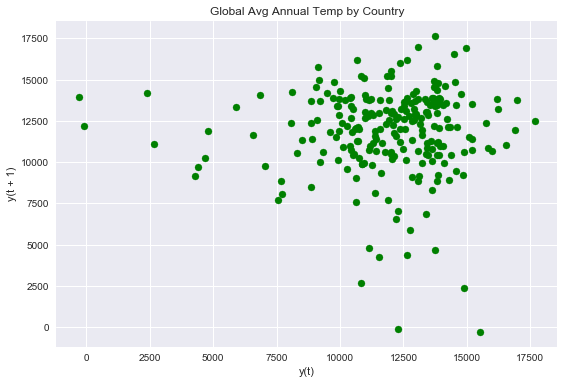

In [19]:
#mean temperature  for  all years at country level
plt.figure()
lag_plot(temp_mean_ctry_df)

plt.title("Global Avg Annual Temp by Country")
plt.tight_layout()
plt.savefig("lag_tmean_ctry.png")
plt.show()

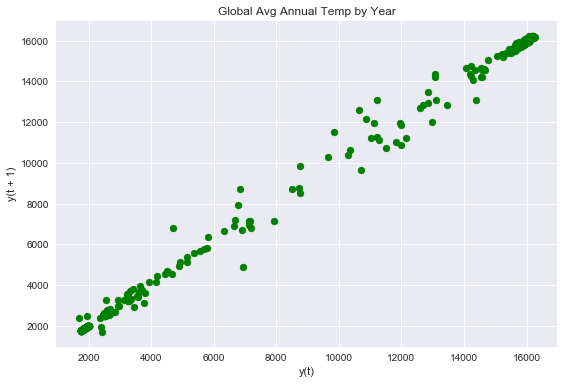

In [20]:
#mean temperature summed  to year level
plt.figure()

lag_plot(temp_mean_df)

plt.title("Global Avg Annual Temp by Year")
plt.tight_layout()
plt.savefig("lag_tmean_df.png")
plt.show()

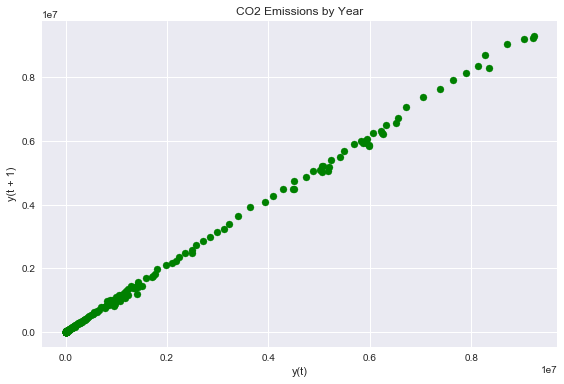

In [21]:
#total annual co2 emission values summed  to year level

plt.figure()
lag_plot(co2_sum_df)

plt.title("CO2 Emissions by Year")
plt.tight_layout()

plt.savefig("lag_co2_sum.png")
plt.show()

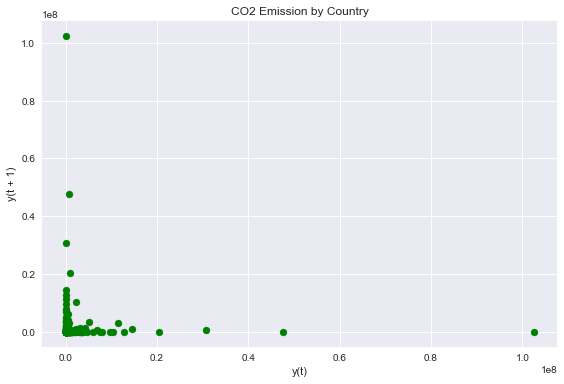

In [22]:
#summed annual co2 emissions by country level
##This  one  is scattered as expected since emissions  vary  greatly from country.
##and  the difference  follows the economic development of  each countryand  global region. 
##Sub Sahara  and other  south african countries exist  at  a much lower  economic level
plt.figure()
lag_plot(co2_sum_ctry_df)

plt.title("CO2 Emission by Country")
plt.tight_layout()
plt.savefig("lag_co2_sum_ctry.png")
plt.show()

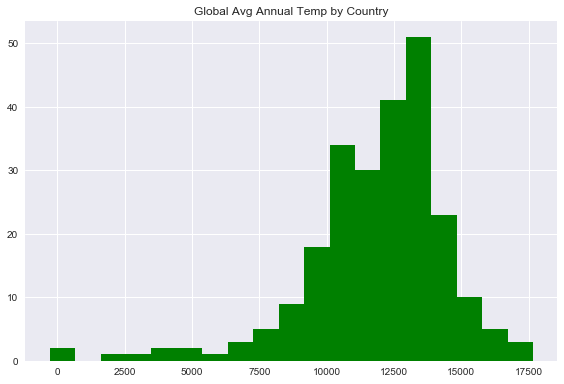

In [23]:
#frequency of values for annual mean temps summed  up to country 

avg1 = np.array(temp_mean_ctry_df['avg_yly_tmp_f'])
plt.hist(avg1, bins='auto') 

plt.title("Global Avg Annual Temp by Country")
plt.tight_layout()

plt.savefig("hist_tmean_ctry.png")
plt.show()

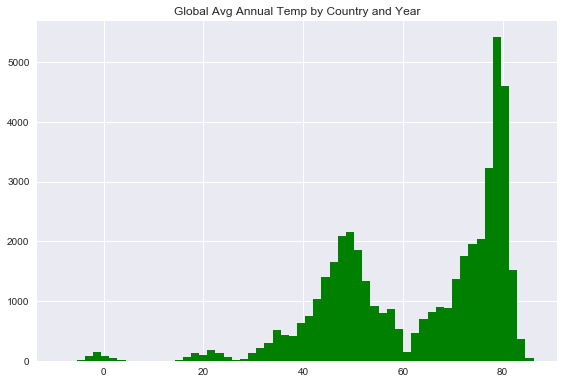

In [24]:
# frequency of values for mean temps by country and year

avg2 = np.array(temp_mean_ct_yr_df['avg_yly_tmp_f'])
plt.hist(avg2, bins='auto') 

plt.title("Global Avg Annual Temp by Country and Year")
plt.tight_layout()

plt.show()
plt.savefig("hist_tmean_ct_yr.png")


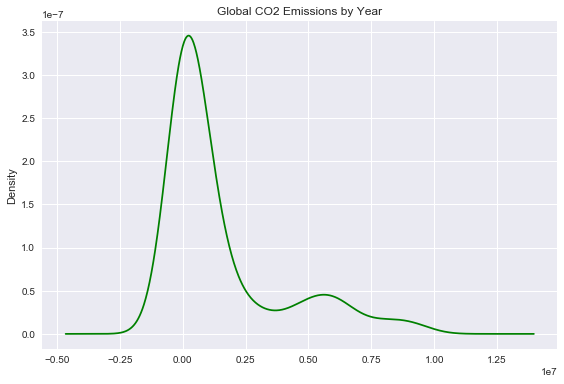

In [25]:
#histogram frequency of values for co2 emissions by year
co2_sum_df['co2'].plot(kind='density')
plt.title("Global CO2 Emissions by Year")

plt.tight_layout()
plt.savefig("hist_co2_yrsum.png")
plt.show()

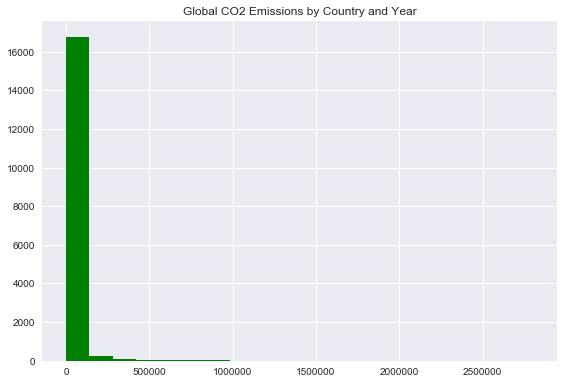

In [26]:
avg4 = np.array(co2_corr_df['co2'])
plt.hist(avg4, bins=20) 

plt.title("Global CO2 Emissions by Country and Year")
plt.tight_layout()

plt.savefig("hist_co2_corr.png")
plt.show()

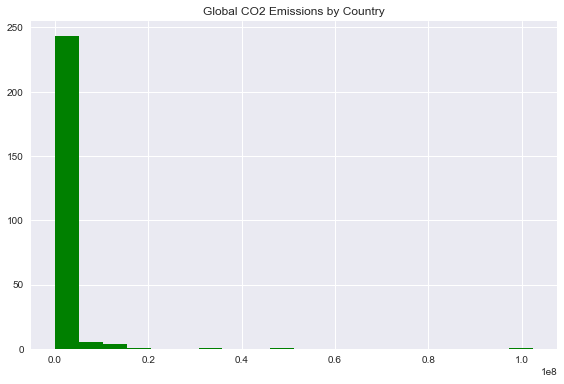

In [27]:
#histogram  for co2 emissions all countries summed for every year
avg5 = np.array(co2_sum_ctry_df['co2'])
plt.hist(avg5, bins=20) 

plt.title("Global CO2 Emissions by Country")
plt.tight_layout()

plt.savefig("hist_co2_sum_ctry.png")
plt.show()

In [28]:
co2_1852 = co2_corr_df.loc[co2_corr_df['year'] > 1851]


In [29]:
co2_1852.head()

,year,country,co2
533,1852,AUSTRALIA,-15
534,1852,CANADA,23
535,1852,NORWAY,41
536,1852,SWEDEN,59
537,1852,DENMARK,91


In [30]:
co2_1902 = co2_corr_df.loc[co2_corr_df['year'] > 1902]

In [31]:
co2_ch = co2_1902.loc[co2_1902["country"] == 'CHINA (MAINLAND)']                                   

print(len(co2_ch.index))
co2_ch.head(5)

112


,year,country,co2
1934,1903,CHINA (MAINLAND),536
1977,1904,CHINA (MAINLAND),570
2021,1905,CHINA (MAINLAND),627
2077,1906,CHINA (MAINLAND),4670
2120,1907,CHINA (MAINLAND),4596


In [32]:

co2_uss = co2_1902.loc[co2_1902["country"] == 'UNITED STATES OF AMERICA']
                                                         
print(len(co2_uss.index))
co2_uss.head(5)

112


,year,country,co2
1962,1903,UNITED STATES OF AMERICA,244106
2005,1904,UNITED STATES OF AMERICA,240235
2049,1905,UNITED STATES OF AMERICA,268695
2091,1906,UNITED STATES OF AMERICA,282025
2134,1907,UNITED STATES OF AMERICA,328003


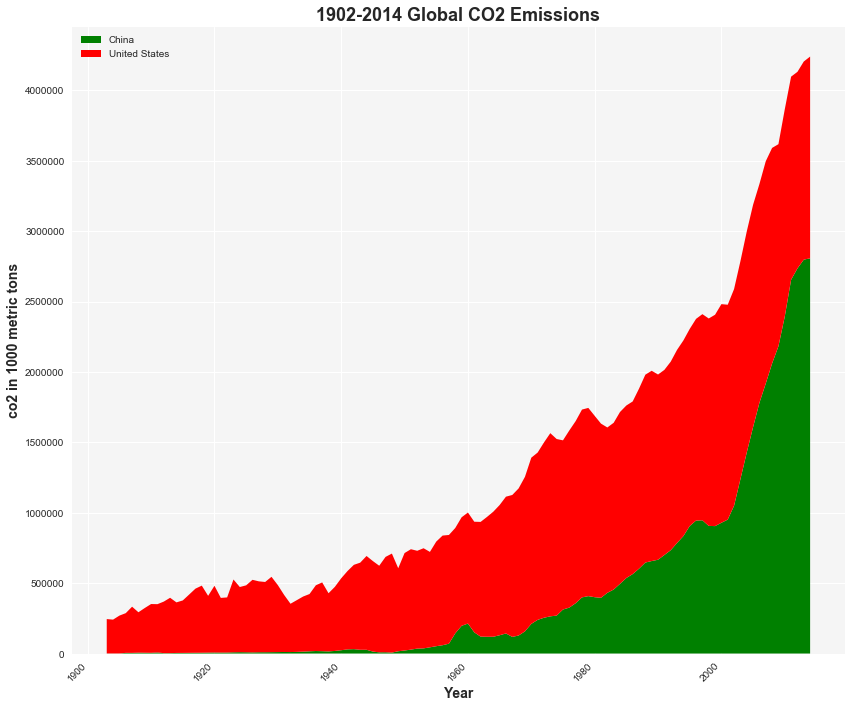

In [33]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

#mycolors1 = [ "blue", "red" ]
#sns.set_palette(mycolors1)

x = co2_ch["year"]  
y1 = co2_ch["co2"]
y2 = co2_uss["co2"]

ax.set_title("1902-2014 Global CO2 Emissions", weight='bold').set_fontsize('18')
ax.set_xlabel("Year", weight='bold').set_fontsize('14')
ax.set_ylabel("co2 in 1000 metric tons", weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')

ax.stackplot(x,y1,y2)

lgnd=ax.legend(["China","United States"], loc="upper left")

plt.tight_layout()
plt.savefig("stackplot_co23_chart.png")
plt.show()

In [34]:
co2_po = co2_1852.loc[co2_1852["country"] == 'POLAND']                                   

print(len(co2_po.index))
co2_po.head(5)

163


,year,country,co2
542,1852,POLAND,1127
557,1853,POLAND,1178
571,1854,POLAND,1304
588,1855,POLAND,1534
603,1856,POLAND,1724


In [35]:
co2_sp = co2_1852.loc[co2_1852["country"] == 'SPAIN']
                                   
print(len(co2_sp.index))
co2_sp.head(5)

163


,year,country,co2
539,1852,SPAIN,146
554,1853,SPAIN,178
569,1854,SPAIN,150
585,1855,SPAIN,151
600,1856,SPAIN,206


In [36]:
#co2_stck3 = co2_corr_df.loc[co2_corr_df["country"] == 'ZIMBABWE']
co2_uk = co2_1852.loc[co2_1852["country"] == 'UNITED KINGDOM']
                                                         
print(len(co2_uk.index))
co2_uk.head(5)

163


,year,country,co2
547,1852,UNITED KINGDOM,31725
562,1853,UNITED KINGDOM,31550
577,1854,UNITED KINGDOM,38019
593,1855,UNITED KINGDOM,35601
608,1856,UNITED KINGDOM,38312


In [37]:

co2_us = co2_1852.loc[co2_1852["country"] == 'UNITED STATES OF AMERICA']
                                                         
print(len(co2_us.index))
co2_us.head(5)

163


,year,country,co2
546,1852,UNITED STATES OF AMERICA,7312
561,1853,UNITED STATES OF AMERICA,8232
576,1854,UNITED STATES OF AMERICA,9050
592,1855,UNITED STATES OF AMERICA,10415
607,1856,UNITED STATES OF AMERICA,10927


In [38]:

co2_sw = co2_1852.loc[co2_1852["country"] == 'SWEDEN']
                                                         
print(len(co2_sw.index))
co2_sw.head(5)

163


,year,country,co2
536,1852,SWEDEN,59
551,1853,SWEDEN,62
566,1854,SWEDEN,92
581,1855,SWEDEN,86
598,1856,SWEDEN,130


In [39]:

co2_nt = co2_1852.loc[co2_1852["country"] == 'NETHERLANDS']
                                                         
print(len(co2_nt.index))
co2_nt.head(5)

163


,year,country,co2
541,1852,NETHERLANDS,1027
556,1853,NETHERLANDS,1138
572,1854,NETHERLANDS,1623
587,1855,NETHERLANDS,1269
602,1856,NETHERLANDS,1289


In [40]:

co2_fr = co2_1852.loc[co2_1852["country"] == 'FRANCE (INCLUDING MONACO)']
                                                         
print(len(co2_fr.index))
co2_fr.head(5)

163


,year,country,co2
545,1852,FRANCE (INCLUDING MONACO),5887
560,1853,FRANCE (INCLUDING MONACO),6916
575,1854,FRANCE (INCLUDING MONACO),7973
591,1855,FRANCE (INCLUDING MONACO),9026
606,1856,FRANCE (INCLUDING MONACO),9452


In [41]:

co2_ca = co2_1852.loc[co2_1852["country"] == 'CANADA']
                                                         
print(len(co2_ca.index))
co2_ca.head(5)

163


,year,country,co2
534,1852,CANADA,23
549,1853,CANADA,28
564,1854,CANADA,34
579,1855,CANADA,41
595,1856,CANADA,49


In [42]:
co2_1878 = co2_corr_df.loc[co2_corr_df['year'] > 1877]

co2_1878.head()

,year,country,co2
1088,1878,ROMANIA,13
1089,1878,FINLAND,35
1090,1878,TURKEY,89
1091,1878,NEW ZEALAND,97
1092,1878,PORTUGAL,175


In [43]:
co2_ind = co2_1878.loc[co2_1878["country"] == 'INDIA']
                                                         
print(len(co2_ind.index))
co2_ind.head(5)

137


,year,country,co2
1099,1878,INDIA,533
1125,1879,INDIA,506
1153,1880,INDIA,566
1182,1881,INDIA,552
1209,1882,INDIA,656


In [44]:
co2_au = co2_1878.loc[co2_1878["country"] == 'AUSTRALIA']
                                                         
print(len(co2_au.index))
co2_au.head(5)

137


,year,country,co2
1093,1878,AUSTRALIA,264
1123,1879,AUSTRALIA,397
1154,1880,AUSTRALIA,602
1180,1881,AUSTRALIA,482
1207,1882,AUSTRALIA,549


In [45]:
co2_usa = co2_1878.loc[co2_1878["country"] == 'UNITED STATES OF AMERICA']
                                                         
print(len(co2_usa.index))
co2_usa.head(5)

137


,year,country,co2
1112,1878,UNITED STATES OF AMERICA,39275
1140,1879,UNITED STATES OF AMERICA,47890
1169,1880,UNITED STATES OF AMERICA,54226
1197,1881,UNITED STATES OF AMERICA,57367
1224,1882,UNITED STATES OF AMERICA,64245


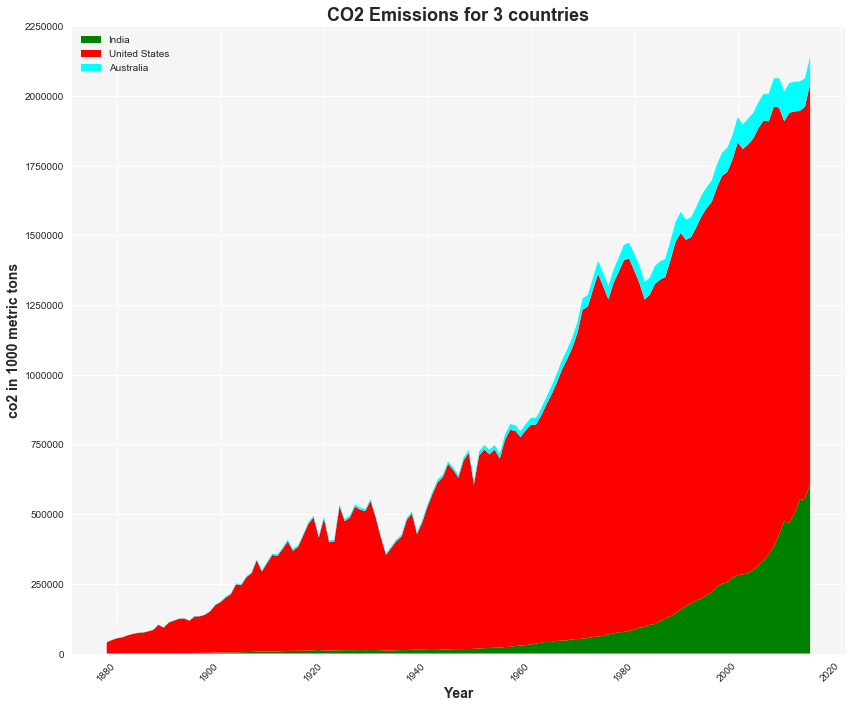

In [46]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

#mycolors2 = [ "magenta", "cyan", "red" ]
#sns.set_palette(mycolors2)

x = co2_ind["year"]  
y1 = co2_ind["co2"]
y2 = co2_usa["co2"]
y3 = co2_au["co2"]

ax.set_title("CO2 Emissions for 3 countries", weight='bold').set_fontsize('18')
ax.set_xlabel("Year", weight='bold').set_fontsize('14')
ax.set_ylabel("co2 in 1000 metric tons", weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')


ax.stackplot(x,y1,y2,y3)

lgnd=ax.legend(["India","United States", "Australia"], loc = "upper left")

plt.tight_layout()
plt.savefig("stackplot_co23_chart.png")
plt.show()

In [47]:
#this dataframe preparation for the autocorrelation plots which needs  a data series  
#temperature data

temp_series=temp_mean_df.iloc[:,1]
#print(temp_series)

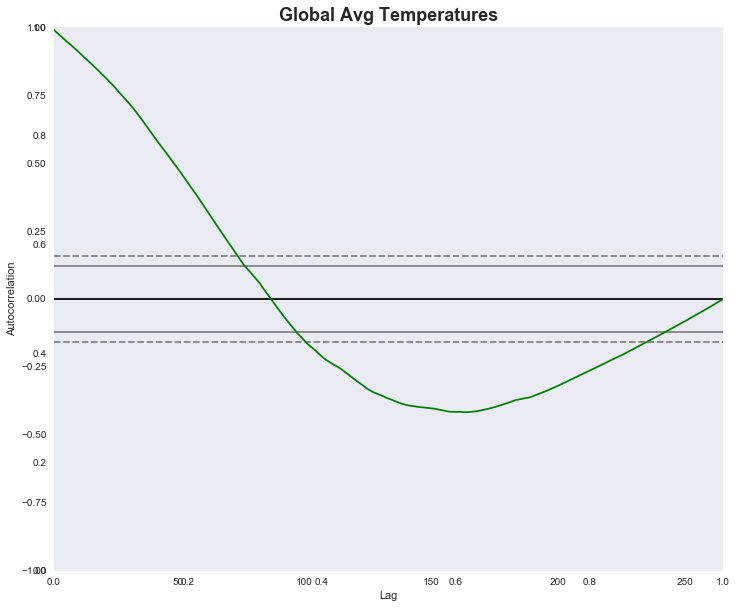

In [48]:
#temp data is annual global

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.grid(True)
ax.set_facecolor("whitesmoke")

ax.set_title("Global Avg Temperatures", weight='bold').set_fontsize('18')




autocorrelation_plot(temp_series)
plt.savefig('autcor1.png')
plt.show()


In [49]:
#co2 data
co2_series=co2_sum_df.iloc[:,1]
#print(co2_series)

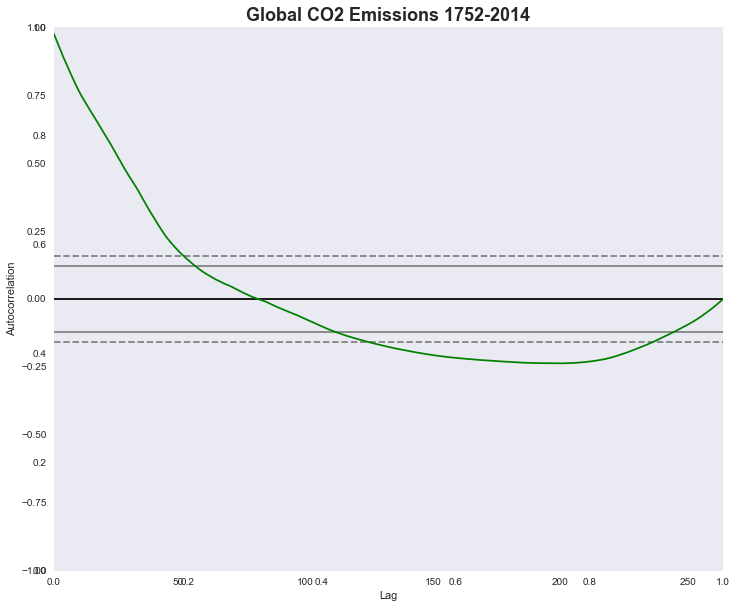

In [50]:
#co2 data is global per year
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.set_title("Global CO2 Emissions 1752-2014", weight='bold').set_fontsize('18')

ax.grid(True)
ax.set_facecolor("whitesmoke")

autocorrelation_plot(co2_series)
plt.savefig('autcor2.png')
plt.show()


In [51]:
#co2 data

co2_1852_to_yr = co2_sum_df.loc[co2_sum_df['year']> 1851]
co2_1852_series=co2_1852_to_yr.iloc[:,1]
#print(co2_1852_series)

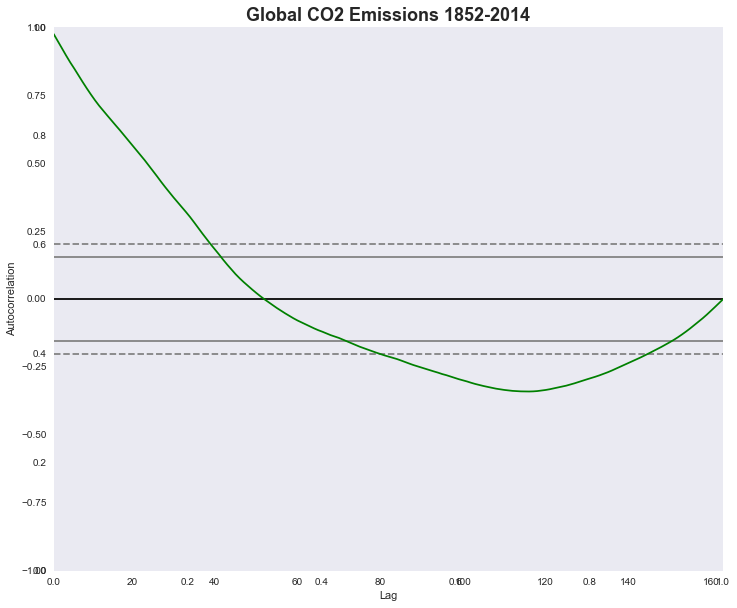

In [52]:
#co2 data is annual global
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.set_title("Global CO2 Emissions 1852-2014", weight='bold').set_fontsize('18')

ax.grid(True)
ax.set_facecolor("whitesmoke")

autocorrelation_plot(co2_1852_series)
plt.savefig('autcor3.png')
plt.show()


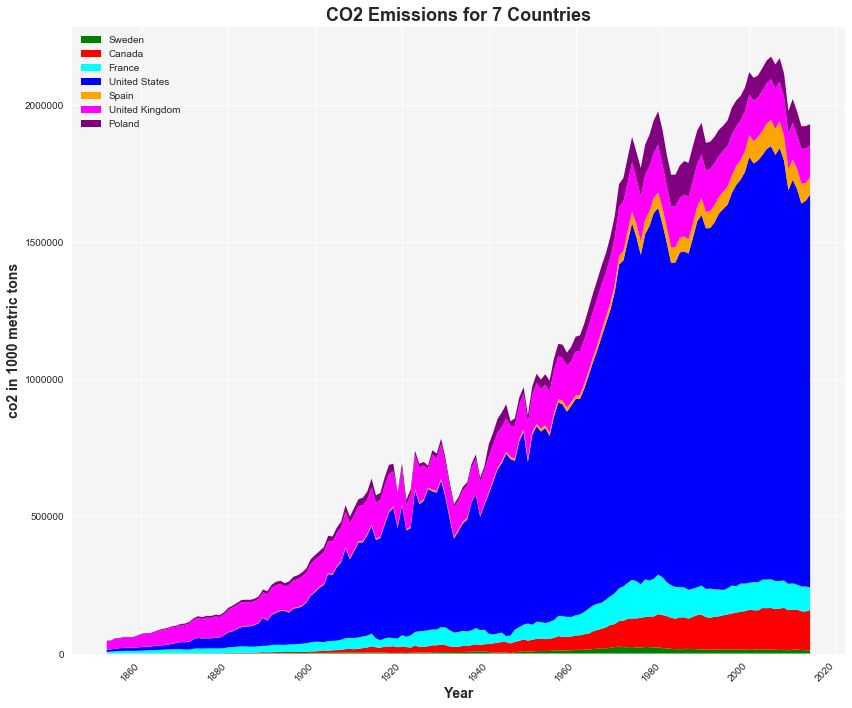

In [53]:
# Dependencies
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

#mycolors3 = ["green", "red", "cyan", "blue","orange", "magenta", "purple" ]
#sns.set_palette(mycolors3)

x = co2_sw["year"]  
y1 = co2_sw["co2"]
y2 = co2_ca["co2"]
y3 = co2_fr["co2"]
y4 = co2_us["co2"]
y5 = co2_sp["co2"]
y6 = co2_uk["co2"]
y7 = co2_po["co2"]

ax.set_title("CO2 Emissions for 7 Countries", weight='bold').set_fontsize('18')
ax.set_xlabel("Year", weight='bold').set_fontsize('14')
ax.set_ylabel("co2 in 1000 metric tons", weight='bold').set_fontsize('14')

ax.grid(True)
ax.set_facecolor("whitesmoke")
fig.autofmt_xdate(rotation=45, ha='right')


ax.stackplot(x,y1,y2,y3,y4,y5,y6,y7)

ax.legend(["Sweden", "Canada","France", "United States", "Spain","United Kingdom", "Poland"], 
          loc="upper left")

plt.tight_layout()
plt.savefig("stackplot_co27_chart.png")
plt.show()

